In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mesostat.metric.autocorr import autocorr_d1_3D

# Does AutoCorr(1) depend on number of datapoints

**Answer**: Mean is the same, variance decreases. Should be good enough for $N=10^3$ and above

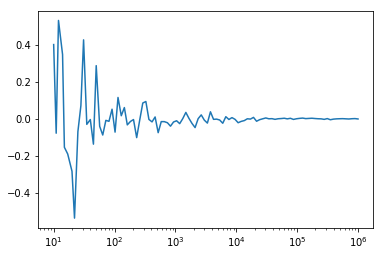

In [2]:
nDataArr = (10**np.linspace(1, 6, 100)).astype(int)

acLst = []
for nData in nDataArr:
    data = np.random.normal(0,1,(1,1,nData))
    acLst += [autocorr_d1_3D(data, {})]

plt.figure()
plt.semilogx(nDataArr, acLst)
plt.show()

# How does AC1 depend on convolution timescale

**Conclusion**:
* AC1 is a monotonic function of convolution timescale
* AC1 is a good predictor of the convolution timescale

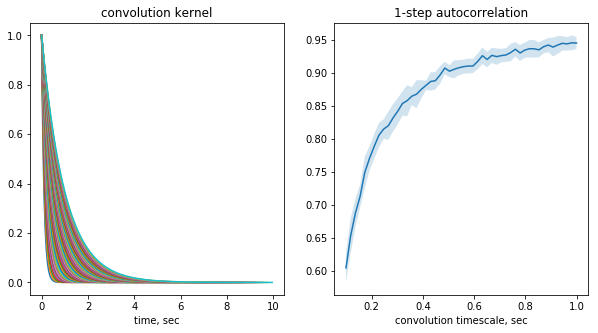

In [3]:
dt = 0.05 # ms, at sampling frequency of 20Hz
tauArr = np.linspace(0.1, 1, 50)

nT = 1000
tArr = np.arange(nT) * dt

fig, ax = plt.subplots(ncols=2, figsize=(10,5))

acMuLst = []
acStdLst = []
for tau in tauArr:
    nKer = int(10 * tau / dt)
    kernel = np.exp(-tArr / tau)[:nKer]
    ax[0].plot(tArr[:nKer], kernel)
    
    acLst = []
    for iTest in range(20):    
        data = np.random.normal(0, 1, nT)
        dataConv = np.convolve(data, kernel)[:nT]
        acLst += [autocorr_d1_3D(dataConv.reshape((1,1,nT)), {})]
        
    acMuLst += [np.mean(acLst)]
    acStdLst += [np.std(acLst)]

acMuLst = np.array(acMuLst)
acStdLst = np.array(acStdLst)
    
ax[1].fill_between(tauArr, acMuLst-acStdLst, acMuLst+acStdLst, alpha=0.2)
ax[1].plot(tauArr, acMuLst)

ax[0].set_xlabel('time, sec')
ax[0].set_title('convolution kernel')
ax[1].set_xlabel('convolution timescale, sec')
ax[1].set_title('1-step autocorrelation')
plt.show()

# How does AC1 depend on added noise

**Concusion**:
* AC1 is a monotonic function of the added noise
* Given convolution timescale, AC1 is a good predictor of SNR

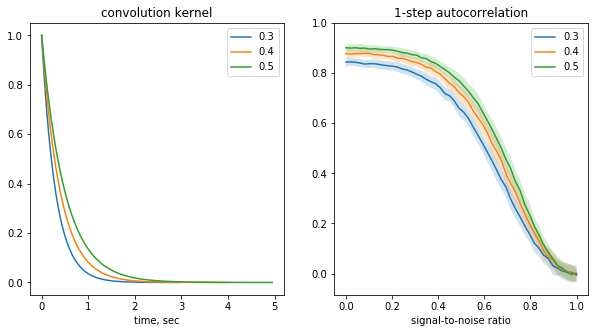

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

dt = 0.05 # s, at sampling frequency of 20Hz

for tau in [0.3, 0.4, 0.5]:  # s, decay timescale

    nT = 1000
    tArr = np.arange(nT) * dt
    noiseFrac = np.linspace(0,1,50)
    nKer = int(10 * tau / dt)
    kernel = np.exp(-tArr / tau)[:nKer]

    ax[0].plot(tArr[:nKer], kernel, label=str(tau))

    acMuLst = []
    acStdLst = []
    for alpha in noiseFrac:    
        acLst = []
        for iTest in range(100):    
            data = np.random.normal(0, 1, nT)
            noise = np.random.normal(0, 1, nT)
            dataConv = np.convolve(data, kernel)[:nT]
            dataNoisy = alpha*noise + (1-alpha)*dataConv

            acLst += [autocorr_d1_3D(dataNoisy.reshape((1,1,nT)), {})]

        acMuLst += [np.mean(acLst)]
        acStdLst += [np.std(acLst)]

    acMuLst = np.array(acMuLst)
    acStdLst = np.array(acStdLst)

    ax[1].fill_between(noiseFrac, acMuLst-acStdLst, acMuLst+acStdLst, alpha=0.2)
    ax[1].plot(noiseFrac, acMuLst, label=str(tau))
    
ax[1].set_ylim([None,1])
ax[0].set_xlabel('time, sec')
ax[0].set_title('convolution kernel')
ax[1].set_xlabel('signal-to-noise ratio')
ax[1].set_title('1-step autocorrelation')
ax[0].legend()
ax[1].legend()
plt.show()